In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('H:\\Dataset\\car.csv')

# Some exploratory analysis

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


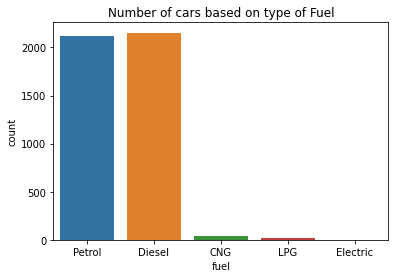

In [15]:
plt.title('Number of cars based on type of Fuel');
sns.countplot(data=df, x='fuel');

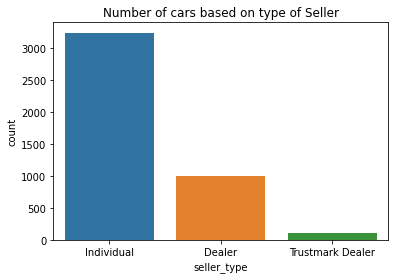

In [16]:
plt.title('Number of cars based on type of Seller');
sns.countplot(data=df, x='seller_type');

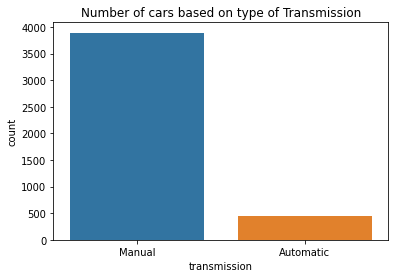

In [18]:
plt.title('Number of cars based on type of Transmission');
sns.countplot(data=df, x='transmission');

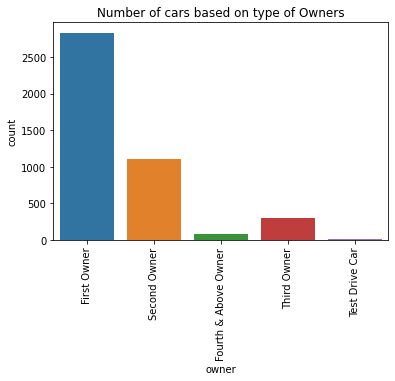

In [19]:
plt.title('Number of cars based on type of Owners');
sns.countplot(data=df, x='owner');
plt.xticks(rotation=90);

In [21]:
#removing name from dataset since it's a unique identifier for each row
df = df.drop('name',axis=1)

In [22]:
#changing categorical to dummy variables
df1 = pd.get_dummies(data=df, drop_first=True)

In [23]:
df1

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,0,0,1,0,1,0,1,0,0
4336,2014,409999,80000,1,0,0,0,1,0,1,0,1,0,0
4337,2009,110000,83000,0,0,0,1,1,0,1,0,1,0,0
4338,2016,865000,90000,1,0,0,0,1,0,1,0,0,0,0


In [24]:
#checking the correlation with the label
df1.corr()['selling_price']

year                            0.413922
selling_price                   1.000000
km_driven                      -0.192289
fuel_Diesel                     0.282947
fuel_Electric                  -0.005095
fuel_LPG                       -0.042434
fuel_Petrol                    -0.269453
seller_type_Individual         -0.236798
seller_type_Trustmark Dealer    0.110176
transmission_Manual            -0.530205
owner_Fourth & Above Owner     -0.078725
owner_Second Owner             -0.161986
owner_Test Drive Car            0.048799
owner_Third Owner              -0.111326
Name: selling_price, dtype: float64

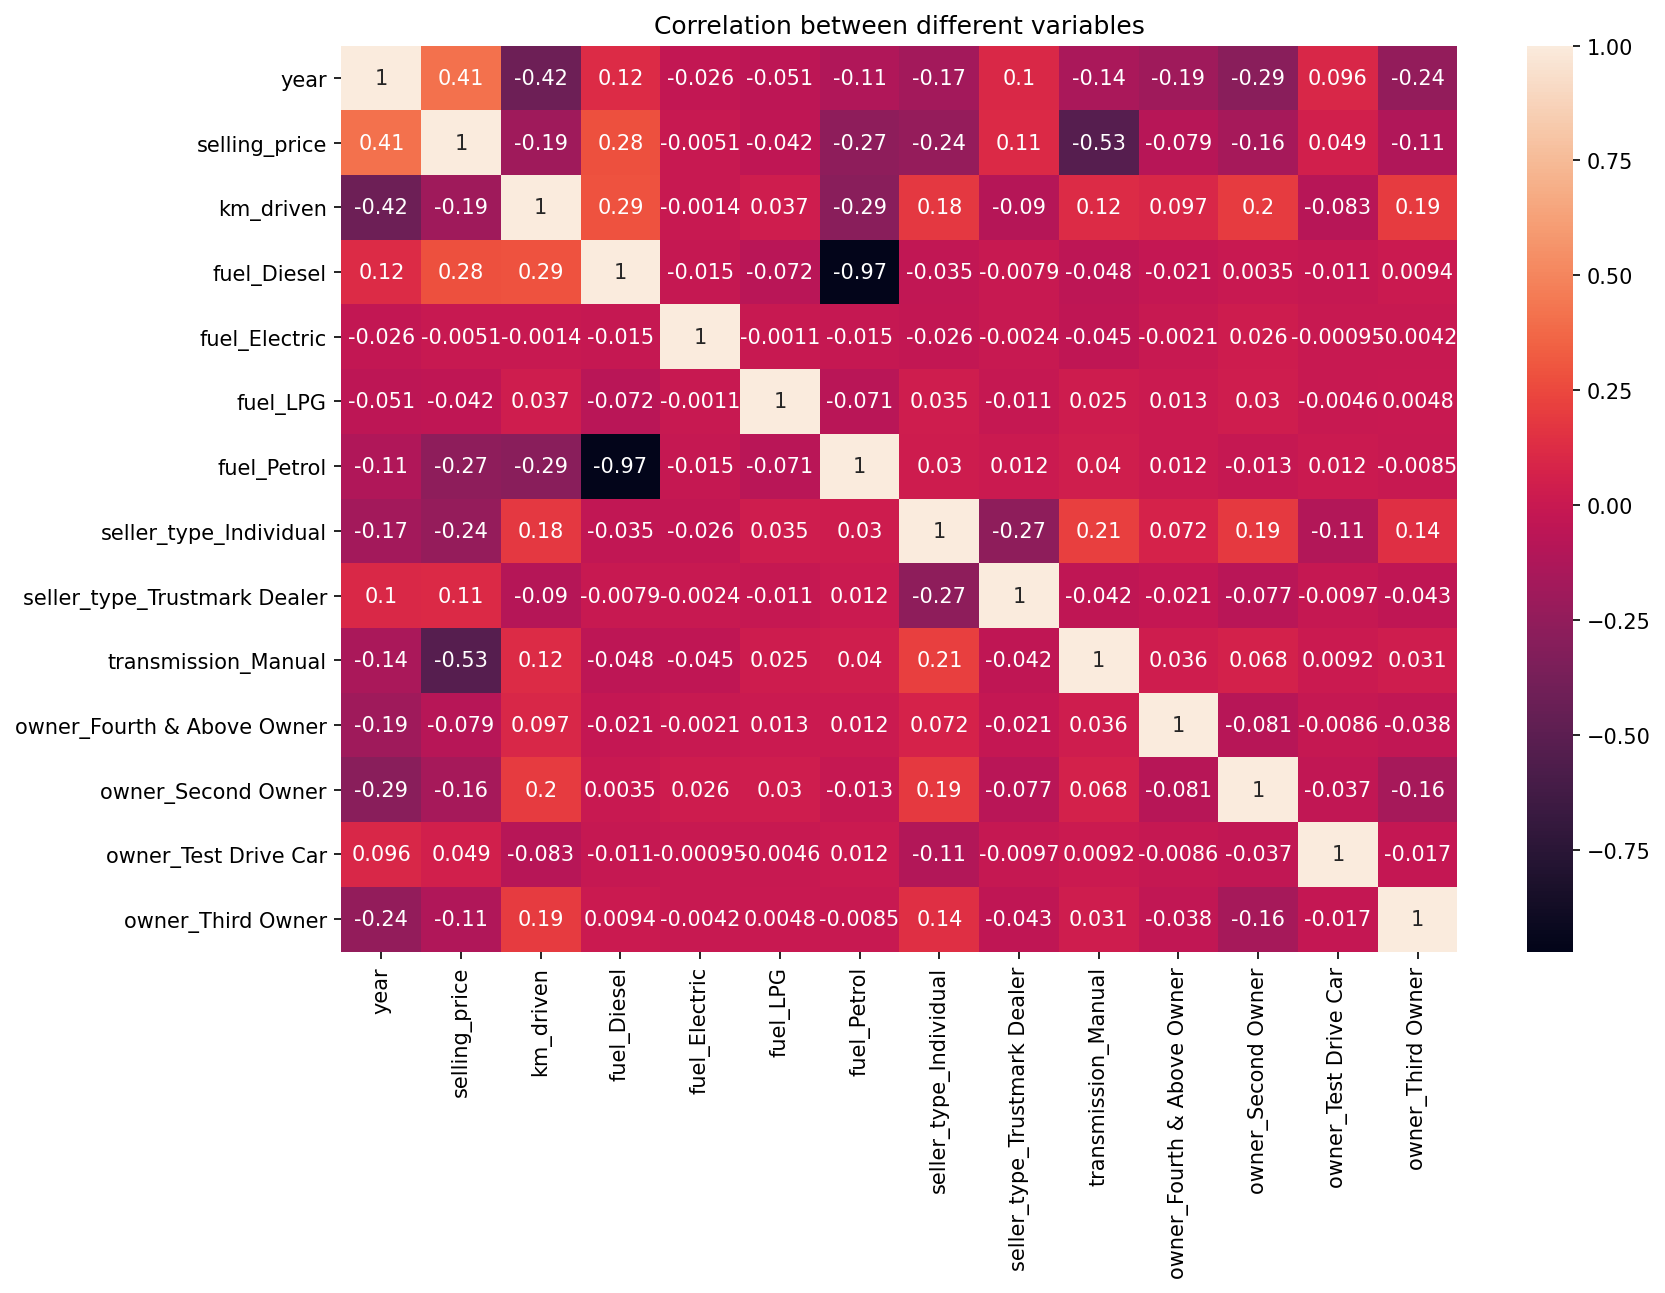

In [26]:
plt.figure(figsize=(12,8),dpi=150);
plt.title('Correlation between different variables')
sns.heatmap(data=df1.corr(),annot=True);

<AxesSubplot:xlabel='year', ylabel='selling_price'>

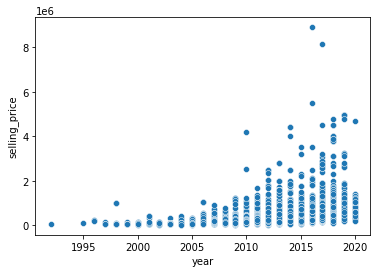

In [29]:
sns.scatterplot(data=df1, x='year',y='selling_price');

In [87]:
#turning year to age
df1['year'] = df1['year'].apply(lambda year: 2021 - year)

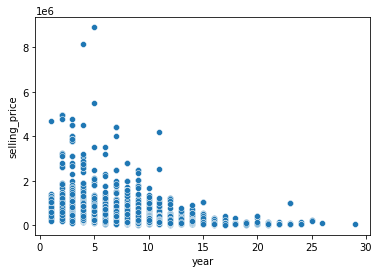

In [89]:
sns.scatterplot(data=df1, x='year',y='selling_price');

(0.0, 500000.0)

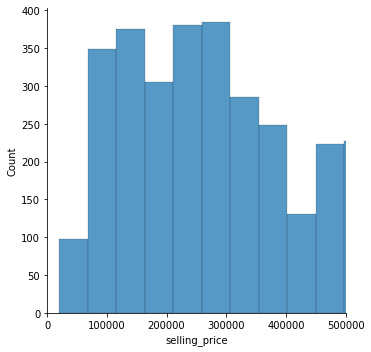

In [40]:
sns.displot(data=df1, x='selling_price');
plt.xlim(0,500000)

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

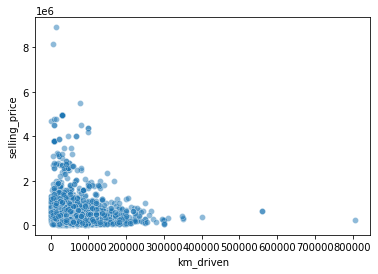

In [45]:
sns.scatterplot(data=df, x='km_driven', y='selling_price',alpha=0.5)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = df1.drop('selling_price',1)

In [95]:
y = df1['selling_price']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
scaled_X_train = scaler.fit_transform(X_train)

In [100]:
scaled_X_test = scaler.transform(X_test)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# compare different models

In [102]:
def report_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    print(mae)
    print(np.sqrt(mse))

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lr = LinearRegression()

In [105]:
report_model(lr,scaled_X_train,y_train,scaled_X_test,y_test)

213213.4540656661
353720.79032627394


In [106]:
from sklearn.linear_model import Ridge

In [107]:
ridge = Ridge()

In [108]:
report_model(ridge,scaled_X_train,y_train,scaled_X_test,y_test)

213210.00813506907
353707.6100673235


In [109]:
from sklearn.linear_model import Lasso

In [110]:
lasso = Lasso()

In [111]:
report_model(lasso,scaled_X_train,y_train,scaled_X_test,y_test)

213212.55951679777
353720.4051702031


In [112]:
from sklearn.linear_model import RidgeCV

In [113]:
ridgecv = RidgeCV()

In [114]:
report_model(ridgecv,scaled_X_train,y_train,scaled_X_test,y_test)

213213.1251944691
353719.47190370725


In [131]:
from sklearn.tree import DecisionTreeRegressor

In [132]:
dtr = DecisionTreeRegressor()

In [133]:
report_model(dtr,scaled_X_train,y_train,scaled_X_test,y_test)

166614.44809541033
316464.7890335014


In [135]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [138]:
rfr = RandomForestRegressor()

In [139]:
report_model(rfr,scaled_X_train,y_train,scaled_X_test,y_test)

154440.84549185052
269592.50690587517


In [140]:
abc = AdaBoostRegressor()

In [141]:
report_model(abc,scaled_X_train,y_train,scaled_X_test,y_test)

341867.5212890843
483516.45853552764


In [ ]:
# Choosing RandomForest as the model
# Using GridSearchCV to find the best hyperparameters

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
params = {
            "n_estimators": np.linspace(100, 1200, 12).astype(int),
            "max_depth": [5, 7, 9, 10, 15, 20, 25, 30, 35, 40],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)]}

In [166]:
model = RandomizedSearchCV(rfr,params)

In [167]:
model.fit(scaled_X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 7, 9, 10, 15, 20, 25,
                                                      30, 35, 40],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              15, 20],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200])})

In [168]:
model.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 15}

In [169]:
y_pred =model.predict(scaled_X_test)

In [170]:
mean_absolute_error(y_test,y_pred)

157175.76291605283

In [171]:
np.sqrt(mean_squared_error(y_test,y_pred))

265676.62337901717

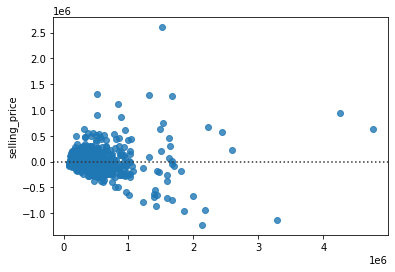

In [173]:
plt.figure('Residuals plot')
sns.residplot(x=y_pred, y=y_test);

# Finalizing the model

In [174]:
final_model = RandomForestRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=3, max_depth=15)

In [175]:
final_model.fit(X,y)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=300)

In [189]:
importance = pd.Series(final_model.feature_importances_,index=X.columns).sort_values(ascending=False)

''

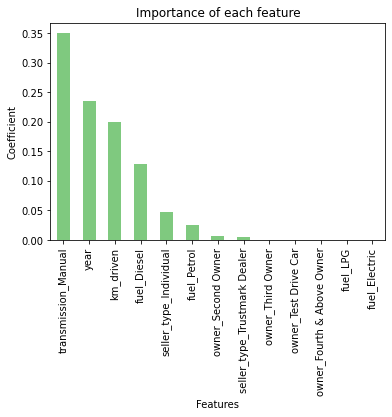

In [192]:
importance.plot(kind='bar',xlabel='Features',ylabel='Coefficient',title='Importance of each feature',colormap='Accent');
;

In [194]:
#saving the model
import pickle

file = open('car_pred.pkl', 'wb')

pickle.dump(final_model, file)